In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('Desktop/borrower_table.csv')

In [3]:
df.head(10)

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid,Unnamed: 16
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3,business,1/31/12,0,NaN,NaN
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,11/2/12,0,NaN,NaN
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8,other,7/16/12,1,1.0,NaN
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,6/5/12,0,NaN,NaN
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,11/28/12,0,NaN,NaN
5,423171,1,NaN,NaN,6100,0.53,6163,5298,1,29500,24,1,other,11/7/12,1,1.0,NaN
6,568977,1,NaN,NaN,600,0.89,305,1456,0,0,50,2,emergency_funds,10/12/12,0,NaN,NaN
7,200139,1,NaN,NaN,4000,0.57,602,2757,1,31700,36,8,business,9/19/12,1,0.0,0.471355
8,991294,0,1.0,0.0,7000,0.52,2575,2917,1,58900,33,3,emergency_funds,12/4/12,1,1.0,NaN
9,875332,0,1.0,0.0,4300,0.83,722,892,1,5400,32,7,business,1/20/12,1,1.0,NaN


In [4]:
df['loan_purpose'].value_counts()

home               24314
business           21707
investment         21484
emergency_funds    18091
other              15504
Name: loan_purpose, dtype: int64

In [5]:
df.describe()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,loan_repaid,Unnamed: 16
count,101100.000000,101100.000000,46153.000000,46153.000000,101100.000000,94128.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,101100.000000,47654.000000,1.000000
mean,499666.826726,0.543492,0.899291,0.364332,4112.743818,0.724140,1799.617616,3177.150821,0.658675,21020.727992,41.491632,3.864748,0.471355,0.644353,0.471355
std,288662.006929,0.498107,0.300946,0.481247,2129.121462,0.186483,1400.545141,2044.448155,0.474157,18937.581415,12.825570,2.635491,0.499181,0.478714,NaN
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.471355
25%,250333.750000,0.000000,1.000000,0.000000,2700.000000,0.600000,834.000000,1706.000000,0.000000,0.000000,32.000000,2.000000,0.000000,0.000000,0.471355
50%,499885.000000,1.000000,1.000000,0.000000,4100.000000,0.730000,1339.000000,2673.000000,1.000000,21500.000000,41.000000,3.000000,0.000000,1.000000,0.471355
75%,749706.250000,1.000000,1.000000,1.000000,5500.000000,0.860000,2409.000000,4241.000000,1.000000,35300.000000,50.000000,6.000000,1.000000,1.000000,0.471355
max,999987.000000,1.000000,1.000000,1.000000,13500.000000,1.090000,10641.000000,13906.000000,1.000000,97200.000000,79.000000,8.000000,1.000000,1.000000,0.471355


In [6]:
df_1 = df.sample(n=15000)
df_1.info()
df_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 18384 to 73102
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   loan_id                                          15000 non-null  int64  
 1   is_first_loan                                    15000 non-null  int64  
 2   fully_repaid_previous_loans                      6976 non-null   float64
 3   currently_repaying_other_loans                   6976 non-null   float64
 4   total_credit_card_limit                          15000 non-null  int64  
 5   avg_percentage_credit_card_limit_used_last_year  13952 non-null  float64
 6   saving_amount                                    15000 non-null  int64  
 7   checking_amount                                  15000 non-null  int64  
 8   is_employed                                      15000 non-null  int64  
 9   yearly_salary           

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid,Unnamed: 16
18384,54134,0,1.0,1.0,5500,0.48,68,2405,0,0,78,8,other,7/17/12,0,NaN,NaN
31181,8764,0,1.0,0.0,2900,0.64,3268,5247,1,40800,24,2,other,6/19/12,1,1.0,NaN
76473,540282,1,NaN,NaN,3600,0.96,2027,4449,1,33100,55,3,business,4/4/12,1,0.0,NaN
43161,463090,1,NaN,NaN,1400,0.55,326,7787,1,54400,42,1,other,5/28/12,0,NaN,NaN
33354,193896,1,NaN,NaN,4300,0.99,4118,6642,1,16300,52,2,business,8/17/12,0,NaN,NaN


In [7]:
df_1['fully_repaid_previous_loans'] = df_1['fully_repaid_previous_loans'].fillna('00.0')
df_1['currently_repaying_other_loans'] = df_1['currently_repaying_other_loans'].fillna('00.0')
df_1['avg_percentage_credit_card_limit_used_last_year'] = df_1['avg_percentage_credit_card_limit_used_last_year'].fillna(df_1['avg_percentage_credit_card_limit_used_last_year'].mean())
df_1['fully_repaid_previous_loans'] = df_1.fully_repaid_previous_loans.astype(float)
df_1['currently_repaying_other_loans'] = df_1.currently_repaying_other_loans.astype(float)
df_1.describe()


,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,loan_repaid,Unnamed: 16
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,7119.000000,0.0
mean,496001.618067,0.534933,0.418733,0.169000,4128.920000,0.725970,1813.051733,3186.290000,0.660533,21084.853333,41.465733,3.866133,0.474600,0.642787,NaN
std,289718.104324,0.498795,0.493368,0.374764,2137.463345,0.179286,1407.267342,2064.771491,0.473544,18863.585508,12.828258,2.634390,0.499371,0.479212,NaN
min,231.000000,0.000000,0.000000,0.000000,0.000000,0.030000,1.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,NaN
25%,241581.250000,0.000000,0.000000,0.000000,2700.000000,0.610000,841.000000,1704.000000,0.000000,0.000000,32.000000,2.000000,0.000000,0.000000,NaN
50%,495911.000000,1.000000,0.000000,0.000000,4100.000000,0.725970,1351.000000,2685.000000,1.000000,21800.000000,41.000000,3.000000,0.000000,1.000000,NaN
75%,746817.000000,1.000000,1.000000,0.000000,5600.000000,0.850000,2446.500000,4253.250000,1.000000,35400.000000,50.000000,6.000000,1.000000,1.000000,NaN
max,999941.000000,1.000000,1.000000,1.000000,12200.000000,1.090000,9232.000000,12994.000000,1.000000,84000.000000,79.000000,8.000000,1.000000,1.000000,NaN


In [8]:
#total credit, saving checking yearly salary!!

In [9]:
mask1 = (df_1['yearly_salary'] < 50000) & (df_1['saving_amount'] < 7000)
#df_1['yearly_salary'].value_counts()
df_1 = df_1[mask1]
df_1.describe()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,loan_repaid,Unnamed: 16
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,6370.000000,0.0
mean,495634.144429,0.534992,0.418039,0.177875,4055.887219,0.728707,1736.611738,3096.695102,0.634180,18301.402575,41.439545,3.898223,0.458174,0.602826,NaN
std,289428.906686,0.498792,0.493254,0.382421,2132.699489,0.178568,1340.562291,2015.660377,0.481677,16474.028733,12.867347,2.639886,0.498265,0.489351,NaN
min,231.000000,0.000000,0.000000,0.000000,0.000000,0.030000,1.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,NaN
25%,241428.500000,0.000000,0.000000,0.000000,2600.000000,0.620000,817.500000,1665.500000,0.000000,0.000000,32.000000,2.000000,0.000000,0.000000,NaN
50%,495169.000000,1.000000,0.000000,0.000000,4000.000000,0.725970,1304.000000,2606.000000,1.000000,19400.000000,41.000000,3.000000,0.000000,1.000000,NaN
75%,746501.000000,1.000000,1.000000,0.000000,5500.000000,0.850000,2285.000000,4054.500000,1.000000,32500.000000,50.000000,6.000000,1.000000,1.000000,NaN
max,999859.000000,1.000000,1.000000,1.000000,12200.000000,1.090000,6978.000000,12994.000000,1.000000,49900.000000,79.000000,8.000000,1.000000,1.000000,NaN


In [10]:
df_1['saving_amount'].value_counts()

717     16
799     16
988     15
620     15
1116    15
        ..
2149     1
6224     1
4067     1
6044     1
6032     1
Name: saving_amount, Length: 4349, dtype: int64

In [11]:
df_1

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid,Unnamed: 16
18384,54134,0,1.0,1.0,5500,0.48000,68,2405,0,0,78,8,other,7/17/12,0,NaN,NaN
31181,8764,0,1.0,0.0,2900,0.64000,3268,5247,1,40800,24,2,other,6/19/12,1,1.0,NaN
76473,540282,1,0.0,0.0,3600,0.96000,2027,4449,1,33100,55,3,business,4/4/12,1,0.0,NaN
33354,193896,1,0.0,0.0,4300,0.99000,4118,6642,1,16300,52,2,business,8/17/12,0,NaN,NaN
3780,187628,1,0.0,0.0,0,0.72597,1390,1313,1,23800,31,3,home,9/11/12,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23042,988117,0,1.0,0.0,4400,0.55000,1492,1233,1,19200,69,5,home,3/1/12,1,1.0,NaN
13752,890917,1,0.0,0.0,2600,0.75000,1155,1894,0,0,38,8,home,6/5/12,0,NaN,NaN
82744,578823,0,0.0,1.0,2000,0.82000,1347,2881,1,18800,40,8,emergency_funds,8/21/12,1,0.0,NaN
65097,567888,1,0.0,0.0,3500,0.87000,1075,6819,1,16000,53,2,investment,6/18/12,0,NaN,NaN


In [12]:
X = df_1[['loan_id', 'is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number']]
y = df_1['loan_granted']
std = StandardScaler()
std.fit(X.values)
X_scl = std.transform(X.values)

In [13]:
df_1.corr()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,loan_repaid,Unnamed: 16
loan_id,1.000000,0.003743,-0.003174,-0.003780,-0.000364,0.008628,0.000555,0.000348,-0.003649,-0.003216,0.005632,0.016788,-0.011230,0.015731,NaN
is_first_loan,0.003743,1.000000,-0.909087,-0.498922,-0.005301,-0.000714,0.000395,0.003167,-0.008092,-0.000088,0.000870,0.001148,-0.026310,0.031100,NaN
fully_repaid_previous_loans,-0.003174,-0.909087,1.000000,0.450813,0.011425,-0.005081,0.007890,0.007201,0.007008,-0.000579,0.000639,0.001852,0.024611,-0.014227,NaN
currently_repaying_other_loans,-0.003780,-0.498922,0.450813,1.000000,-0.116588,0.064737,-0.168908,-0.166113,-0.113764,-0.132430,-0.007294,0.041447,-0.058160,-0.335522,NaN
total_credit_card_limit,-0.000364,-0.005301,0.011425,-0.116588,1.000000,-0.084988,0.234289,0.244929,0.193657,0.203950,0.001551,-0.061345,0.189596,0.405363,NaN
avg_percentage_credit_card_limit_used_last_year,0.008628,-0.000714,-0.005081,0.064737,-0.084988,1.000000,-0.118228,-0.108128,-0.079429,-0.087963,-0.000729,0.032408,-0.109192,-0.202612,NaN
saving_amount,0.000555,0.000395,0.007890,-0.168908,0.234289,-0.118228,1.000000,0.312317,0.246238,0.269571,0.008721,-0.079235,0.138103,0.517363,NaN
checking_amount,0.000348,0.003167,0.007201,-0.166113,0.244929,-0.108128,0.312317,1.000000,0.229304,0.259505,0.005706,-0.068387,0.143186,0.513229,NaN
is_employed,-0.003649,-0.008092,0.007008,-0.113764,0.193657,-0.079429,0.246238,0.229304,1.000000,0.843777,0.011867,-0.061980,0.504500,0.286787,NaN
yearly_salary,-0.003216,-0.000088,-0.000579,-0.132430,0.203950,-0.087963,0.269571,0.259505,0.843777,1.000000,0.019366,-0.066293,0.430941,0.357846,NaN


In [14]:
df_1['loan_granted'].value_counts()

0    7533
1    6370
Name: loan_granted, dtype: int64

In [15]:
df_1['yearly_salary'].value_counts()

0        5090
28500      45
29000      41
32500      41
27400      40
         ... 
200         1
4100        1
100         1
2500        1
3900        1
Name: yearly_salary, Length: 497, dtype: int64

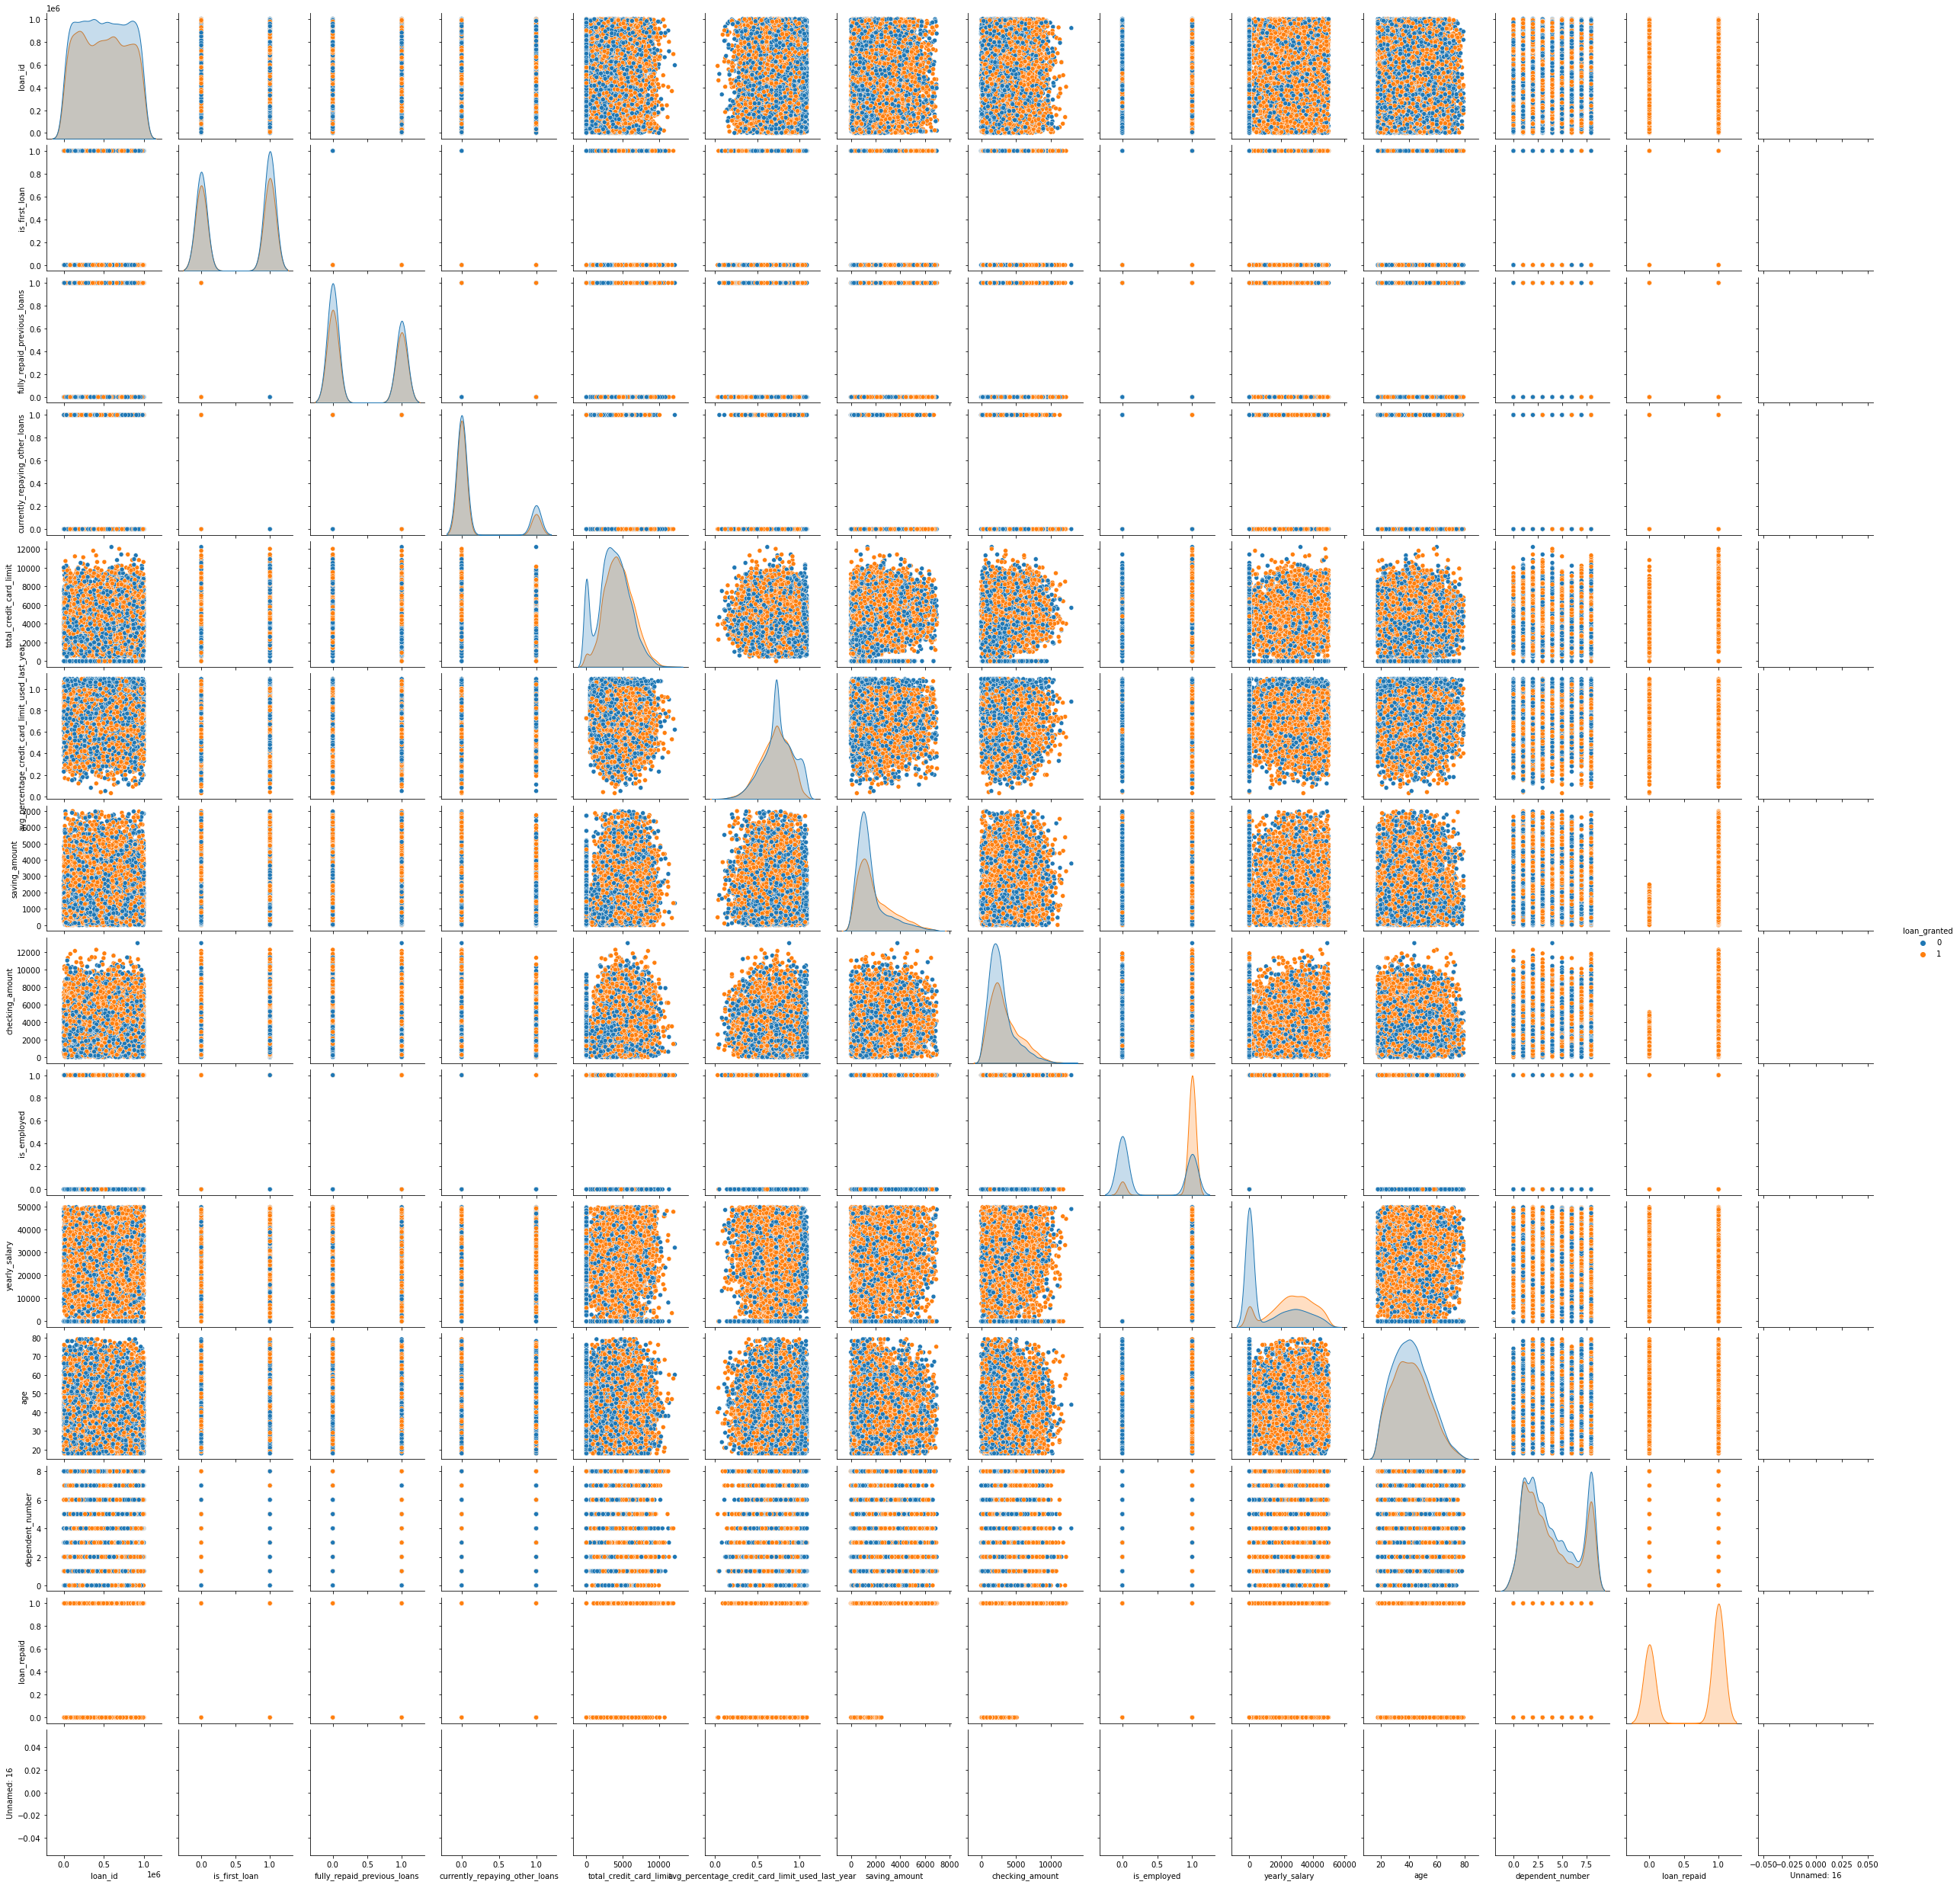

In [16]:
sns.pairplot(df_1, hue='loan_granted');

In [17]:
X_scl_train, X_scl_test, y_train, y_test = train_test_split(X_scl, y, test_size=0.2, random_state=42)

In [18]:
k_range = list(range(1,71))
k_scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores_knn = cross_val_score(knn,X_scl_train,y_train,cv=10,scoring='accuracy')
    k_scores.append(scores_knn.mean())
k_scores

[0.6576149592455416,
 0.6491632569954817,
 0.6960085839684048,
 0.6806331484677488,
 0.7138111074482731,
 0.7019422198090585,
 0.7276573619810351,
 0.7144402806595693,
 0.7317029934004278,
 0.7234309048717898,
 0.7383570232762576,
 0.7316129845449785,
 0.742673246847266,
 0.738177247959045,
 0.7449211250945336,
 0.7427626901174478,
 0.748427268966498,
 0.7458195976911194,
 0.750044842831934,
 0.7510342130608183,
 0.7531026391824545,
 0.7508549225309779,
 0.7522039241921826,
 0.7519340592216255,
 0.7532830608828303,
 0.7515748317787818,
 0.7525641212097709,
 0.7518446967493391,
 0.7529236718441957,
 0.7526539684694293,
 0.7528337437866418,
 0.7521142385283148,
 0.7523841842967676,
 0.7530135999017499,
 0.7529237526420911,
 0.7524738699606353,
 0.7519347056047884,
 0.7532830608828301,
 0.7522044089795549,
 0.7536430963046274,
 0.7518447775472343,
 0.7521144001241055,
 0.7517549302875758,
 0.7517549302875759,
 0.7513052899998061,
 0.7525641212097707,
 0.7515749933745726,
 0.75184405036617

In [19]:
list(zip(k_range,k_scores))

[(1, 0.6576149592455416),
 (2, 0.6491632569954817),
 (3, 0.6960085839684048),
 (4, 0.6806331484677488),
 (5, 0.7138111074482731),
 (6, 0.7019422198090585),
 (7, 0.7276573619810351),
 (8, 0.7144402806595693),
 (9, 0.7317029934004278),
 (10, 0.7234309048717898),
 (11, 0.7383570232762576),
 (12, 0.7316129845449785),
 (13, 0.742673246847266),
 (14, 0.738177247959045),
 (15, 0.7449211250945336),
 (16, 0.7427626901174478),
 (17, 0.748427268966498),
 (18, 0.7458195976911194),
 (19, 0.750044842831934),
 (20, 0.7510342130608183),
 (21, 0.7531026391824545),
 (22, 0.7508549225309779),
 (23, 0.7522039241921826),
 (24, 0.7519340592216255),
 (25, 0.7532830608828303),
 (26, 0.7515748317787818),
 (27, 0.7525641212097709),
 (28, 0.7518446967493391),
 (29, 0.7529236718441957),
 (30, 0.7526539684694293),
 (31, 0.7528337437866418),
 (32, 0.7521142385283148),
 (33, 0.7523841842967676),
 (34, 0.7530135999017499),
 (35, 0.7529237526420911),
 (36, 0.7524738699606353),
 (37, 0.7519347056047884),
 (38, 0.753283

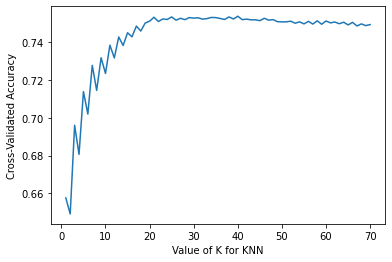

In [20]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

In [21]:
print(max(k_scores))

0.7536430963046274


In [22]:
k_scores[29-1]

0.7529236718441957

In [128]:
#lor_base = LogisticRegression()
#lor_base.fit(X_scl_train,y_train)
#y_pred_lor_base_train = lor_base.predict(X_scl_train)
#precision_score(y_train, y_pred_lor_base_train)
#scores_lor_base = cross_val_score(lor_base,X_scl_train,y_train,cv=10)
#(scores_lor_base.mean())


In [24]:
lor_scores=[]
for lor_C in np.arange(0.01,5,0.01):
    lor = LogisticRegression(C=lor_C)
    scores_lor = cross_val_score(lor,X_scl_train,y_train,cv=10)
    lor_scores.append(scores_lor.mean())

In [25]:
print(max(lor_scores))

0.7354801334134848


In [26]:
lor_scores[int(0.01)]

0.7354801334134848

In [27]:
list(zip(np.arange(0.01,5,0.01),lor_scores))

[(0.01, 0.7354801334134848),
 (0.02, 0.7340419308757845),
 (0.03, 0.7334124344729067),
 (0.04, 0.7334123536750115),
 (0.05, 0.7334123536750115),
 (0.060000000000000005, 0.7333224256174575),
 (0.06999999999999999, 0.7331425695023497),
 (0.08, 0.7331425695023496),
 (0.09, 0.7331425695023496),
 (0.09999999999999999, 0.7330526414447956),
 (0.11, 0.7330526414447956),
 (0.12, 0.7330526414447956),
 (0.13, 0.7330526414447956),
 (0.14, 0.7332323359641127),
 (0.15000000000000002, 0.7331424079065588),
 (0.16, 0.7331424079065588),
 (0.17, 0.7331424079065588),
 (0.18000000000000002, 0.7331424079065588),
 (0.19, 0.7331424079065588),
 (0.2, 0.7331424079065588),
 (0.21000000000000002, 0.7331424079065588),
 (0.22, 0.7331424079065588),
 (0.23, 0.7331424079065588),
 (0.24000000000000002, 0.7330524798490048),
 (0.25, 0.7330524798490048),
 (0.26, 0.7330524798490048),
 (0.27, 0.7330524798490048),
 (0.28, 0.7330524798490048),
 (0.29000000000000004, 0.7330524798490048),
 (0.3, 0.7330524798490048),
 (0.31, 0.7

In [123]:
lor = LogisticRegression(C=0.01)

In [124]:
lor.fit(X_scl_train,y_train)

LogisticRegression(C=0.01)

In [125]:


y_pred_lor_train = lor.predict(X_scl_train)

In [126]:
precision_score(y_train, y_pred_lor_train)

0.6537523317549147

In [127]:
#rf_base = RandomForestClassifier()
#rf_base.fit(X_scl_train,y_train)
#y_pred_rf_base_train = rf_base.predict(X_scl_train)
#precision_score(y_train, y_pred_rf_base_train)

In [33]:
random_grid = {'n_estimators': [1,10,40,70,100,150,200], 'max_depth': [1,5,10,20]}

In [34]:
randomforest_random = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator =randomforest_random , param_distributions = random_grid, cv = 10, n_jobs = -1)
rf_random.fit(X_scl_train,y_train)


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 5, 10, 20],
                                        'n_estimators': [1, 10, 40, 70, 100,
                                                         150, 200]})

In [35]:
rf_random.best_params_

{'n_estimators': 100, 'max_depth': 10}

In [36]:
y_pred_rf_train = rf_random.predict(X_scl_train)

In [71]:
precision_score(y_train, y_pred_rf_train)

0.7184620273276136

# Feature Engineering

In [72]:
df_1

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid,Unnamed: 16
18384,54134,0,1.0,1.0,5500,0.48000,68,2405,0,0,78,8,other,7/17/12,0,NaN,NaN
31181,8764,0,1.0,0.0,2900,0.64000,3268,5247,1,40800,24,2,other,6/19/12,1,1.0,NaN
76473,540282,1,0.0,0.0,3600,0.96000,2027,4449,1,33100,55,3,business,4/4/12,1,0.0,NaN
33354,193896,1,0.0,0.0,4300,0.99000,4118,6642,1,16300,52,2,business,8/17/12,0,NaN,NaN
3780,187628,1,0.0,0.0,0,0.72597,1390,1313,1,23800,31,3,home,9/11/12,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23042,988117,0,1.0,0.0,4400,0.55000,1492,1233,1,19200,69,5,home,3/1/12,1,1.0,NaN
13752,890917,1,0.0,0.0,2600,0.75000,1155,1894,0,0,38,8,home,6/5/12,0,NaN,NaN
82744,578823,0,0.0,1.0,2000,0.82000,1347,2881,1,18800,40,8,emergency_funds,8/21/12,1,0.0,NaN
65097,567888,1,0.0,0.0,3500,0.87000,1075,6819,1,16000,53,2,investment,6/18/12,0,NaN,NaN


In [73]:
target_value = df_1['loan_granted'].value_counts()
target_value[0]/len(df_1)

0.5418255052866288

In [74]:
target_value[1]/len(df_1)

0.45817449471337124

In [75]:
df_1.loan_id.is_unique

True

In [42]:
df_2= df_1.loc[:,['is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number',  'loan_granted']]

df_2['avail_amount']= df_2['saving_amount'] + df_2['checking_amount']
df_2['avail_score'] = df_2['avail_amount'] > (df_2['total_credit_card_limit'] * df_2['avg_percentage_credit_card_limit_used_last_year'])

df_2

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,avail_amount,avail_score
18384,0,1.0,1.0,5500,0.48000,68,2405,0,0,78,8,0,2473,False
31181,0,1.0,0.0,2900,0.64000,3268,5247,1,40800,24,2,1,8515,True
76473,1,0.0,0.0,3600,0.96000,2027,4449,1,33100,55,3,1,6476,True
33354,1,0.0,0.0,4300,0.99000,4118,6642,1,16300,52,2,0,10760,True
3780,1,0.0,0.0,0,0.72597,1390,1313,1,23800,31,3,0,2703,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23042,0,1.0,0.0,4400,0.55000,1492,1233,1,19200,69,5,1,2725,True
13752,1,0.0,0.0,2600,0.75000,1155,1894,0,0,38,8,0,3049,True
82744,0,0.0,1.0,2000,0.82000,1347,2881,1,18800,40,8,1,4228,True
65097,1,0.0,0.0,3500,0.87000,1075,6819,1,16000,53,2,0,7894,True


In [43]:
df_2.replace(True,'1',inplace = True)
df_2.replace(False,'0',inplace = True)
df_2['avail_score'] = df_2.avail_score.astype(float)
df_2

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,avail_amount,avail_score
18384,0,1.0,1.0,5500,0.48000,68,2405,0,0,78,8,0,2473,0.0
31181,0,1.0,0.0,2900,0.64000,3268,5247,1,40800,24,2,1,8515,1.0
76473,1,0.0,0.0,3600,0.96000,2027,4449,1,33100,55,3,1,6476,1.0
33354,1,0.0,0.0,4300,0.99000,4118,6642,1,16300,52,2,0,10760,1.0
3780,1,0.0,0.0,0,0.72597,1390,1313,1,23800,31,3,0,2703,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23042,0,1.0,0.0,4400,0.55000,1492,1233,1,19200,69,5,1,2725,1.0
13752,1,0.0,0.0,2600,0.75000,1155,1894,0,0,38,8,0,3049,1.0
82744,0,0.0,1.0,2000,0.82000,1347,2881,1,18800,40,8,1,4228,1.0
65097,1,0.0,0.0,3500,0.87000,1075,6819,1,16000,53,2,0,7894,1.0


In [76]:
X_2 = df_2[['is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'avail_score']]
y_2 = df_2['loan_granted']

std_2 = StandardScaler()
std_2.fit(X_2.values)
X_scl_2 = std_2.transform(X_2.values)

X_scl_train_2, X_scl_test_2, y_train_2, y_test_2 = train_test_split(X_scl_2, y, test_size=0.20, random_state=42)

lor_2 = LogisticRegression(C=0.01)
lor_2.fit(X_scl_train_2,y_train_2)
scores_lor_2 = cross_val_score(lor_2,X_scl_train_2,y_train_2,cv=10)
scores_lor_2.mean()


rf_2 = RandomForestClassifier(n_estimators = 100, max_depth = 10)
rf_2.fit(X_scl_train_2,y_train_2)
scores_rf_2 = cross_val_score(rf_2,X_scl_train_2,y_train_2,cv=10)
scores_rf_2.mean()

print("Logistic Regression CV Score: {:6.4f},   Random Forest CV Score: {:6.4f}".format(scores_lor_2.mean(), 
                                                     scores_rf_2.mean()))


Logistic Regression CV Score: 0.7358,   Random Forest CV Score: 0.7851


In [45]:
y_pred_train_lor_2 = lor_2.predict(X_scl_train_2)

print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train_2, y_pred_train_lor_2), 
                                                     recall_score(y_train_2, y_pred_train_lor_2)))


fpr_lor_2, tpr_lor_2, thresholds_lor_2 = roc_curve(y_train_2, lor_2.predict_proba(X_scl_train_2)[:,1])
print("LOR ROC AUC score = ", roc_auc_score(y_train_2, lor_2.predict_proba(X_scl_train_2)[:,1]))

Precision: 0.6537,   Recall: 0.8949
LOR ROC AUC score =  0.782884214295095


In [85]:
y_pred_train_rf_2 = rf_2.predict(X_scl_train_2)

print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train_2, y_pred_train_rf_2), 
                                                     recall_score(y_train_2, y_pred_train_rf_2)))


fpr_rf_2, tpr_rf_2, thresholds_rf_2 = roc_curve(y_train_2, rf_2.predict_proba(X_scl_train_2)[:,1])
print("RF ROC AUC score = ", roc_auc_score(y_train_2, rf_2.predict_proba(X_scl_train_2)[:,1]))

Precision: 0.7182,   Recall: 0.8880
RF ROC AUC score =  0.939149002090877


In [47]:
df_3= df_2.loc[:,[ 'is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number',  'loan_granted',
       'avail_amount', 'avail_score']]

df_3['total_debt'] = df_3['total_credit_card_limit'] * df_3['avg_percentage_credit_card_limit_used_last_year']
df_3['total_income'] = df_3['saving_amount'] + df_3['checking_amount'] + df_3['yearly_salary']
df_3['d_to_i_ratio'] = (df_3['total_debt'] / df_3['total_income']) < 0.35

df_3.replace(True,'1',inplace = True)
df_3.replace(False,'0',inplace = True)
df_3['d_to_i_ratio'] = df_3.d_to_i_ratio.astype(float)
df_3

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,avail_amount,avail_score,total_debt,total_income,d_to_i_ratio
18384,0,1.0,1.0,5500,0.48000,68,2405,0,0,78,8,0,2473,0.0,2640.0,2473,0.0
31181,0,1.0,0.0,2900,0.64000,3268,5247,1,40800,24,2,1,8515,1.0,1856.0,49315,1.0
76473,1,0.0,0.0,3600,0.96000,2027,4449,1,33100,55,3,1,6476,1.0,3456.0,39576,1.0
33354,1,0.0,0.0,4300,0.99000,4118,6642,1,16300,52,2,0,10760,1.0,4257.0,27060,1.0
3780,1,0.0,0.0,0,0.72597,1390,1313,1,23800,31,3,0,2703,1.0,0.0,26503,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23042,0,1.0,0.0,4400,0.55000,1492,1233,1,19200,69,5,1,2725,1.0,2420.0,21925,1.0
13752,1,0.0,0.0,2600,0.75000,1155,1894,0,0,38,8,0,3049,1.0,1950.0,3049,0.0
82744,0,0.0,1.0,2000,0.82000,1347,2881,1,18800,40,8,1,4228,1.0,1640.0,23028,1.0
65097,1,0.0,0.0,3500,0.87000,1075,6819,1,16000,53,2,0,7894,1.0,3045.0,23894,1.0


In [77]:
X_3 = df_3[['is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'avail_score','d_to_i_ratio']]
y_3 = df_3['loan_granted']

std_3 = StandardScaler()
std_3.fit(X_3.values)
X_scl_3 = std_3.transform(X_3.values)

X_scl_train_3, X_scl_test_3, y_train_3, y_test_3 = train_test_split(X_scl_3, y, test_size=0.20, random_state=42)

lor_3 = LogisticRegression(C=0.01)
lor_3.fit(X_scl_train_3,y_train_3)
scores_lor_3 = cross_val_score(lor_3,X_scl_train_3,y_train_3,cv=10)
scores_lor_3.mean()

rf_3 = RandomForestClassifier(n_estimators = 100, max_depth = 10)
rf_3.fit(X_scl_train_3,y_train_3)
scores_rf_3 = cross_val_score(rf_3,X_scl_train_3,y_train_3,cv=10)
scores_rf_3.mean()

print("Logistic Regression CV Score: {:6.4f},   Random Forest CV Score: {:6.4f}".format(scores_lor_3.mean(), 
                                                     scores_rf_3.mean()))


Logistic Regression CV Score: 0.7366,   Random Forest CV Score: 0.7851


In [84]:
y_pred_train_3 = lor_3.predict(X_scl_train_3)

print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train_3, y_pred_train_3), 
                                                     recall_score(y_train_3, y_pred_train_3)))


fpr_lor_3, tpr_lor_3, thresholds_lor_3 = roc_curve(y_train_3, lor_3.predict_proba(X_scl_train_3)[:,1])
print("LOR ROC AUC score = ", roc_auc_score(y_train_3, lor_3.predict_proba(X_scl_train_3)[:,1]))

Precision: 0.6565,   Recall: 0.8933
LOR ROC AUC score =  0.7823980410795847


In [83]:
y_pred_train_rf_3 = rf_3.predict(X_scl_train_3)

print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train_3, y_pred_train_rf_3), 
                                                     recall_score(y_train_3, y_pred_train_rf_3)))


fpr_rf_3, tpr_rf_3, thresholds_rf_3 = roc_curve(y_train_3, rf_3.predict_proba(X_scl_train_3)[:,1])
print("RF ROC AUC score = ", roc_auc_score(y_train_3, rf_3.predict_proba(X_scl_train_3)[:,1]))

Precision: 0.7182,   Recall: 0.8872
RF ROC AUC score =  0.9351952210534435


In [51]:
df_4= df_3.loc[:,[ 'is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'loan_granted', 'avail_score','d_to_i_ratio']]

df_4['depend_status'] = (df_4['yearly_salary'] / df_4['dependent_number']) > 12500

df_4.replace(True,'1',inplace = True)
df_4.replace(False,'0',inplace = True)
df_4['depend_status'] = df_4.depend_status.astype(float)

df_4

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,avail_score,d_to_i_ratio,depend_status
18384,0,1.0,1.0,5500,0.48000,68,2405,0,0,78,8,0,0.0,0.0,0.0
31181,0,1.0,0.0,2900,0.64000,3268,5247,1,40800,24,2,1,1.0,1.0,1.0
76473,1,0.0,0.0,3600,0.96000,2027,4449,1,33100,55,3,1,1.0,1.0,0.0
33354,1,0.0,0.0,4300,0.99000,4118,6642,1,16300,52,2,0,1.0,1.0,0.0
3780,1,0.0,0.0,0,0.72597,1390,1313,1,23800,31,3,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23042,0,1.0,0.0,4400,0.55000,1492,1233,1,19200,69,5,1,1.0,1.0,0.0
13752,1,0.0,0.0,2600,0.75000,1155,1894,0,0,38,8,0,1.0,0.0,0.0
82744,0,0.0,1.0,2000,0.82000,1347,2881,1,18800,40,8,1,1.0,1.0,0.0
65097,1,0.0,0.0,3500,0.87000,1075,6819,1,16000,53,2,0,1.0,1.0,0.0


In [52]:
df_4.corr()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,avail_score,d_to_i_ratio,depend_status
is_first_loan,1.000000,-0.909087,-0.498922,-0.005301,-0.000714,0.000395,0.003167,-0.008092,-0.000088,0.000870,0.001148,-0.026310,0.006753,0.002792,0.000469
fully_repaid_previous_loans,-0.909087,1.000000,0.450813,0.011425,-0.005081,0.007890,0.007201,0.007008,-0.000579,0.000639,0.001852,0.024611,-0.007404,-0.003380,0.001644
currently_repaying_other_loans,-0.498922,0.450813,1.000000,-0.116588,0.064737,-0.168908,-0.166113,-0.113764,-0.132430,-0.007294,0.041447,-0.058160,-0.075687,-0.108400,-0.086921
total_credit_card_limit,-0.005301,0.011425,-0.116588,1.000000,-0.084988,0.234289,0.244929,0.193657,0.203950,0.001551,-0.061345,0.189596,-0.321634,-0.046483,0.132149
avg_percentage_credit_card_limit_used_last_year,-0.000714,-0.005081,0.064737,-0.084988,1.000000,-0.118228,-0.108128,-0.079429,-0.087963,-0.000729,0.032408,-0.109192,-0.295770,-0.155183,-0.054979
saving_amount,0.000395,0.007890,-0.168908,0.234289,-0.118228,1.000000,0.312317,0.246238,0.269571,0.008721,-0.079235,0.138103,0.294832,0.242683,0.172125
checking_amount,0.003167,0.007201,-0.166113,0.244929,-0.108128,0.312317,1.000000,0.229304,0.259505,0.005706,-0.068387,0.143186,0.396421,0.252990,0.156894
is_employed,-0.008092,0.007008,-0.113764,0.193657,-0.079429,0.246238,0.229304,1.000000,0.843777,0.011867,-0.061980,0.504500,0.089434,0.797975,0.424048
yearly_salary,-0.000088,-0.000579,-0.132430,0.203950,-0.087963,0.269571,0.259505,0.843777,1.000000,0.019366,-0.066293,0.430941,0.097985,0.710761,0.512284
age,0.000870,0.000639,-0.007294,0.001551,-0.000729,0.008721,0.005706,0.011867,0.019366,1.000000,-0.001576,-0.003219,0.008197,0.013145,0.012132


In [78]:
X_4 = df_4[[ 'is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'avail_score','d_to_i_ratio', 'depend_status']]

y_4 = df_4['loan_granted']

std_4 = StandardScaler()
std_4.fit(X_4.values)
X_scl_4 = std_4.transform(X_4.values)


X_scl_train_4, X_scl_test_4, y_train_4, y_test_4 = train_test_split(X_scl_4, y, test_size=0.20, random_state=42)

lor_4 = LogisticRegression(C=0.01)
lor_4.fit(X_scl_train_4,y_train_4)
scores_lor_4 = cross_val_score(lor_4,X_scl_train_4,y_train_4,cv=10)
scores_lor_4.mean()

rf_4 = RandomForestClassifier(n_estimators = 100, max_depth = 10)
rf_4.fit(X_scl_train_4,y_train_4)
scores_rf_4 = cross_val_score(rf_4,X_scl_train_4,y_train_4,cv=10)
scores_rf_4.mean()

print("Logistic Regression CV Score: {:6.4f},   Random Forest CV Score: {:6.4f}".format(scores_lor_4.mean(), 
                                                     scores_rf_4.mean()))


Logistic Regression CV Score: 0.7369,   Random Forest CV Score: 0.7854


In [82]:
y_pred_train_4 = lor_4.predict(X_scl_train_4)

print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train_4, y_pred_train_4), 
                                                     recall_score(y_train_4, y_pred_train_4)))


fpr_lor_4, tpr_lor_4, thresholds_lor_4 = roc_curve(y_train_4, lor_4.predict_proba(X_scl_train_4)[:,1])
print("LOR ROC AUC score = ", roc_auc_score(y_train_4, lor_4.predict_proba(X_scl_train_4)[:,1]))



Precision: 0.6569,   Recall: 0.8923
LOR ROC AUC score =  0.7823565440491305


In [86]:
y_pred_train_rf_4 = rf_4.predict(X_scl_train_4)

print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_train_4, y_pred_train_rf_4), 
                                                     recall_score(y_train_4, y_pred_train_rf_4)))


fpr_rf_4, tpr_rf_4, thresholds_rf_4 = roc_curve(y_train_4, rf_4.predict_proba(X_scl_train_4)[:,1])
print("RF ROC AUC score = ", roc_auc_score(y_train_4, rf_4.predict_proba(X_scl_train_4)[:,1]))

Precision: 0.7190,   Recall: 0.8876
RF ROC AUC score =  0.9371789028836595


In [87]:
from sklearn.metrics import roc_auc_score, roc_curve
lor_4 = LogisticRegression(C=0.01)
lor_4.fit(X_scl_train_4, y_train_4)
fpr_lor, tpr_lor, thresholds_lor = roc_curve(y_train_4, lor_4.predict_proba(X_scl_train_4)[:,1])

randomforest_4 = RandomForestClassifier(n_estimators=100, max_depth=10)
randomforest_4.fit(X_scl_train_4, y_train_4)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_4, randomforest_4.predict_proba(X_scl_train_4)[:,1])

optimal_idx = np.argmax(tpr_lor - fpr_lor)
optimal_threshold = thresholds_lor[optimal_idx]


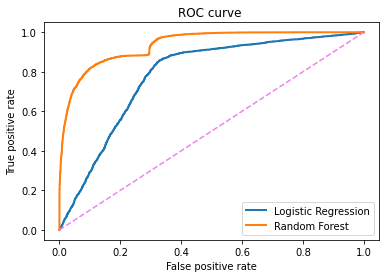

In [115]:
plt.plot(fpr_lor, tpr_lor,lw=2, label = 'Logistic Regression')
plt.plot(fpr_rf, tpr_rf,lw=2, label = 'Random Forest')
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve ')
plt.legend();
#print("LR ROC AUC score = ", roc_auc_score(y_train_4, lor_4.predict_proba(X_scl_train_4)[:,1]))
#print("RF ROC AUC score = ", roc_auc_score(y_train_4, randomforest_4.predict_proba(X_scl_train_4)[:,1]))
#print("Optimal LR Threshold: ", optimal_threshold)



In [88]:
print("LR ROC AUC score = ", roc_auc_score(y_test_4, lor_4.predict_proba(X_scl_test_4)[:,1]))
print("RF ROC AUC score = ", roc_auc_score(y_test_4, randomforest_4.predict_proba(X_scl_test_4)[:,1]))

LR ROC AUC score =  0.7809002153281596
RF ROC AUC score =  0.7986988725713138


In [89]:
y_pred_test_4 = lor_4.predict(X_scl_test_4)

print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test_4, y_pred_test_4), 
                                                     recall_score(y_test_4, y_pred_test_4)))

Precision: 0.6639,   Recall: 0.8892


In [90]:
y_pred_test_rf_4 = rf_4.predict(X_scl_test_4)

print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test_4, y_pred_test_rf_4), 
                                                     recall_score(y_test_4, y_pred_test_rf_4)))

Precision: 0.7243,   Recall: 0.8729


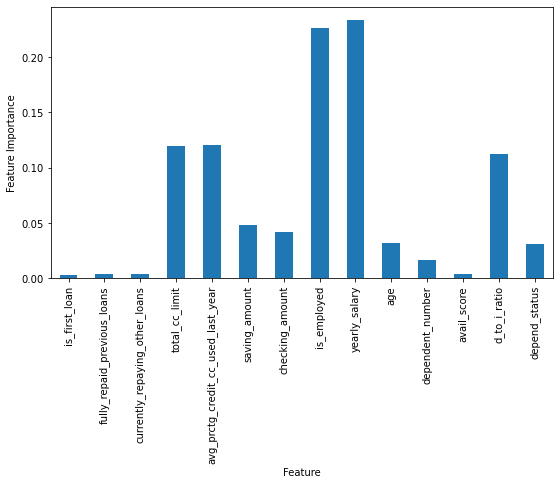

In [91]:
importance = pd.Series( randomforest_4.feature_importances_, index=[ 'is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_cc_limit',
       'avg_prctg_credit_cc_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'avail_score','d_to_i_ratio', 'depend_status'])
sorted(importance)
importance.plot(kind='bar', figsize=(9,5), xlabel = 'Feature', ylabel = 'Feature Importance');
#sns.barplot(x=index, y= importance, data=randomforest_4.feature_importances_, order=sorted(randomforest_4.feature_importances_))
#importance

In [92]:
lor_4.coef_, lor_4.intercept_  #zip

(array([[-0.0127506 ,  0.03637523, -0.00959083,  0.27419599, -0.14702152,
         -0.03423517, -0.01228689,  0.94130725,  0.05728323, -0.01352657,
          0.0199234 ,  0.0285363 ,  0.16575919,  0.01976985]]),
 array([-0.3024033]))

In [93]:
index=[['loan_id', 'is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'avail_score','d_to_i_ratio', 'depend_status']]
array_lor = lor_4.coef_.tolist()


In [64]:
list(zip(index,array_lor))

[(['loan_id',
   'is_first_loan',
   'fully_repaid_previous_loans',
   'currently_repaying_other_loans',
   'total_credit_card_limit',
   'avg_percentage_credit_card_limit_used_last_year',
   'saving_amount',
   'checking_amount',
   'is_employed',
   'yearly_salary',
   'age',
   'dependent_number',
   'avail_score',
   'd_to_i_ratio',
   'depend_status'],
  [-0.012750599348154975,
   0.036375226744962255,
   -0.009590828184805045,
   0.27419598648998933,
   -0.1470215157747291,
   -0.03423516604450933,
   -0.012286886098024273,
   0.9413072479060502,
   0.057283227922698375,
   -0.013526566079069541,
   0.019923401808736453,
   0.02853630241373889,
   0.16575918510598828,
   0.01976984656380668])]

In [65]:
list(zip(index,np.exp(lor_4.coef_)))


[(['loan_id',
   'is_first_loan',
   'fully_repaid_previous_loans',
   'currently_repaying_other_loans',
   'total_credit_card_limit',
   'avg_percentage_credit_card_limit_used_last_year',
   'saving_amount',
   'checking_amount',
   'is_employed',
   'yearly_salary',
   'age',
   'dependent_number',
   'avail_score',
   'd_to_i_ratio',
   'depend_status'],
  array([0.98733035, 1.0370449 , 0.99045502, 1.31547259, 0.8632754 ,
         0.96634423, 0.98778829, 2.56333014, 1.05895569, 0.98656451,
         1.0201232 , 1.02894736, 1.18028884, 1.01996656]))]

In [94]:
y_pred_lor = lor_4.predict(X_scl_train_4)
confusion_matrix(y_train_4,y_pred_lor)

array([[3663, 2371],
       [ 548, 4540]])

In [95]:
y_pred_rf = randomforest_4.predict(X_scl_train_4)
confusion_matrix(y_train_4,y_pred_rf)

array([[4265, 1769],
       [ 575, 4513]])

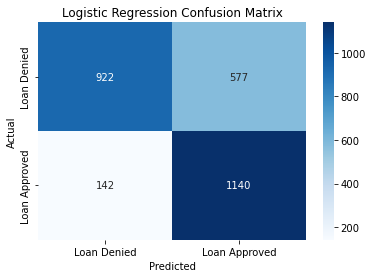

In [117]:
y_pred_lor_test = lor_4.predict(X_scl_test_4)
confusion_matrix(y_test_4,y_pred_lor_test)
sns.heatmap(confusion_matrix(y_test_4,y_pred_lor_test),annot=True, fmt='g', cmap = 'Blues', xticklabels=['Loan Denied', 'Loan Approved'],
               yticklabels=['Loan Denied', 'Loan Approved'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix');

In [97]:
y_pred_rf_test = randomforest_4.predict(X_scl_test_4)
confusion_matrix(y_test_4,y_pred_rf_test)

array([[1073,  426],
       [ 163, 1119]])

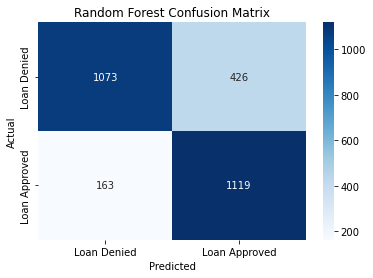

In [118]:
sns.heatmap(confusion_matrix(y_test_4,y_pred_rf_test),annot=True, fmt='g', cmap = 'Blues', xticklabels=['Loan Denied', 'Loan Approved'],
               yticklabels=['Loan Denied', 'Loan Approved'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix');